In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
#Reading the data from the csv file
cars_data = pd.read_csv('/content/car_price.csv')
cars_data

,CarName,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,hatchback,rwd,front,gas,std,two,six,ohcv,mpfi,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,sedan,fwd,front,gas,std,four,four,ohc,mpfi,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,sedan,4wd,front,gas,std,four,five,ohc,mpfi,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,bmw x3,sedan,rwd,front,gas,std,four,six,ohc,mpfi,...,2765,164,3.31,3.19,9.0,121,4250,21,28,21105.0
206,mitsubishi g4,hatchback,fwd,front,gas,std,two,four,ohc,2bbl,...,2328,122,3.35,3.46,8.5,88,5000,25,32,8499.0
207,peugeot 304,sedan,rwd,front,diesel,turbo,four,four,l,idi,...,3197,152,3.70,3.52,21.0,95,4150,28,33,13200.0
208,peugeot 504 (sw),wagon,rwd,front,gas,std,four,four,l,mpfi,...,3230,120,3.46,3.19,8.4,97,5000,19,24,12440.0


In [57]:
#Finding the shape of the data
cars_data.shape

(210, 25)

In [58]:
#Describing the data
cars_data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.828571,98.947143,174.354286,65.935714,53.768571,2565.909524,127.266667,3.333905,3.258286,10.224381,104.000000,5110.476190,25.180952,30.695238,13289.665081
std,1.244757,6.172319,12.457557,2.141794,2.489242,522.279331,41.297095,0.270150,0.311277,4.068746,39.114725,484.530811,6.487059,6.835908,7918.471818
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,3.150000,3.110000,8.525000,70.000000,4800.000000,19.000000,25.000000,7823.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2422.500000,120.000000,3.320000,3.290000,9.000000,95.000000,5100.000000,24.000000,30.000000,10470.000000
75%,2.000000,102.400000,183.500000,66.900000,55.575000,2953.500000,145.750000,3.587500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16502.250000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [59]:
#Finding the information of the data
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           210 non-null    object 
 1   carbody           210 non-null    object 
 2   drivewheel        210 non-null    object 
 3   enginelocation    210 non-null    object 
 4   fueltype          210 non-null    object 
 5   aspiration        210 non-null    object 
 6   doornumber        210 non-null    object 
 7   cylindernumber    210 non-null    object 
 8   enginetype        210 non-null    object 
 9   fuelsystem        210 non-null    object 
 10  symboling         210 non-null    int64  
 11  wheelbase         210 non-null    float64
 12  carlength         210 non-null    float64
 13  carwidth          210 non-null    float64
 14  carheight         210 non-null    float64
 15  curbweight        210 non-null    int64  
 16  enginesize        210 non-null    int64  
 1

In [60]:
#Finding the null values in the dataset
cars_data.isnull().sum()

CarName             0
carbody             0
drivewheel          0
enginelocation      0
fueltype            0
aspiration          0
doornumber          0
cylindernumber      0
enginetype          0
fuelsystem          0
symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [61]:
cars_data.head()

,CarName,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,hatchback,rwd,front,gas,std,two,six,ohcv,mpfi,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,sedan,fwd,front,gas,std,four,four,ohc,mpfi,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,sedan,4wd,front,gas,std,four,five,ohc,mpfi,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [62]:
#Counting the cars Company wise
cars_data['CarName'].value_counts()

peugeot 504         7
toyota corolla      6
toyota corona       6
subaru dl           4
mitsubishi g4       4
                   ..
mazda glc 4         1
mazda rx2 coupe     1
maxda glc deluxe    1
maxda rx3           1
volvo 246           1
Name: CarName, Length: 147, dtype: int64

In [63]:
#Removing the Car names and keeping only the company names
cars_data['CarsCompany'] = cars_data['CarName'].apply(lambda x:x.strip().split(' ')[0])
cars_data = cars_data.drop(['CarName'], axis = 1)

In [64]:
cars_data.head()

,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem,symboling,...,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarsCompany
0,convertible,rwd,front,gas,std,two,four,dohc,mpfi,3,...,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,convertible,rwd,front,gas,std,two,four,dohc,mpfi,3,...,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,hatchback,rwd,front,gas,std,two,six,ohcv,mpfi,1,...,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,sedan,fwd,front,gas,std,four,four,ohc,mpfi,2,...,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,sedan,4wd,front,gas,std,four,five,ohc,mpfi,2,...,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [65]:
cars_data['CarsCompany'].value_counts()

toyota         31
nissan         17
mazda          15
peugeot        14
mitsubishi     14
honda          13
subaru         12
volvo          11
volkswagen      9
dodge           9
bmw             9
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarsCompany, dtype: int64

In [66]:
#Correcting the spellings of the company names
cars_data['CarsCompany'].replace('toyouta', 'toyota', inplace = True)
cars_data['CarsCompany'].replace('Nissan', 'nissan', inplace = True)
cars_data['CarsCompany'].replace('maxda', 'mazda', inplace = True)
cars_data['CarsCompany'].replace('vokswagen', 'volkswagen', inplace = True)
cars_data['CarsCompany'].replace('vw', 'volkswagen', inplace = True)
cars_data['CarsCompany'].replace('porcshce', 'porsche', inplace = True)

In [67]:
#Counting the number of cars of each company
cars_data['CarsCompany'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     14
peugeot        14
honda          13
volkswagen     12
subaru         12
volvo          11
dodge           9
bmw             9
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarsCompany, dtype: int64

<Axes: xlabel='carwidth', ylabel='Density'>

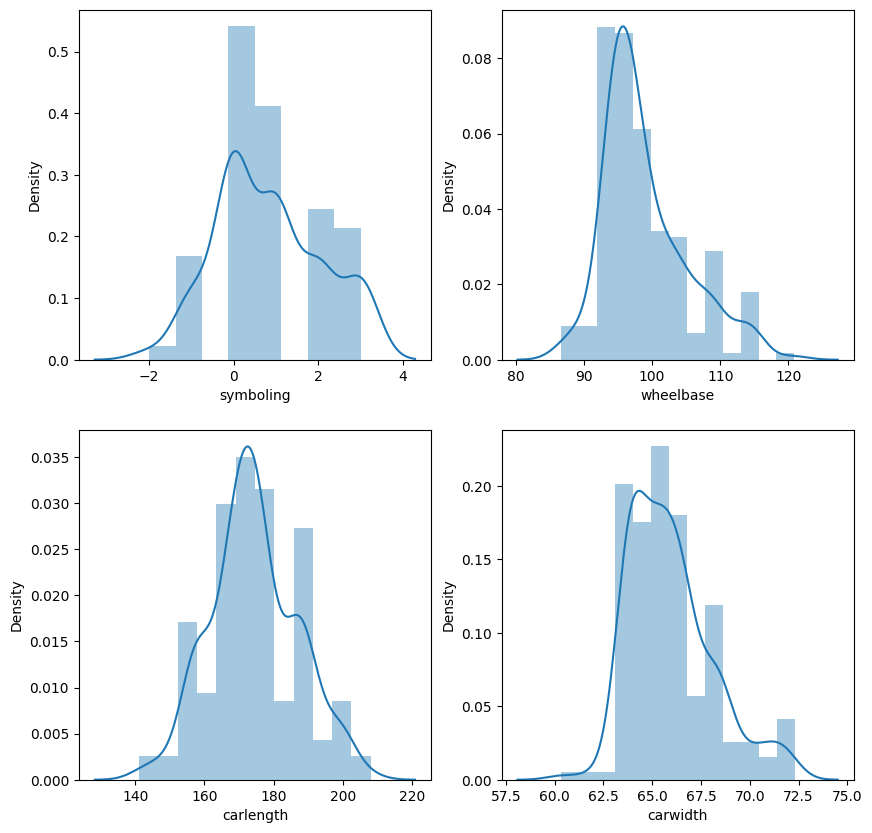

In [68]:
#Plotting vaious properties of the cars
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(cars_data['symboling'])
plt.subplot(2,2,2)
sns.distplot(cars_data['wheelbase'])
plt.subplot(2,2,3)
sns.distplot(cars_data['carlength'])
plt.subplot(2,2,4)
sns.distplot(cars_data['carwidth'])

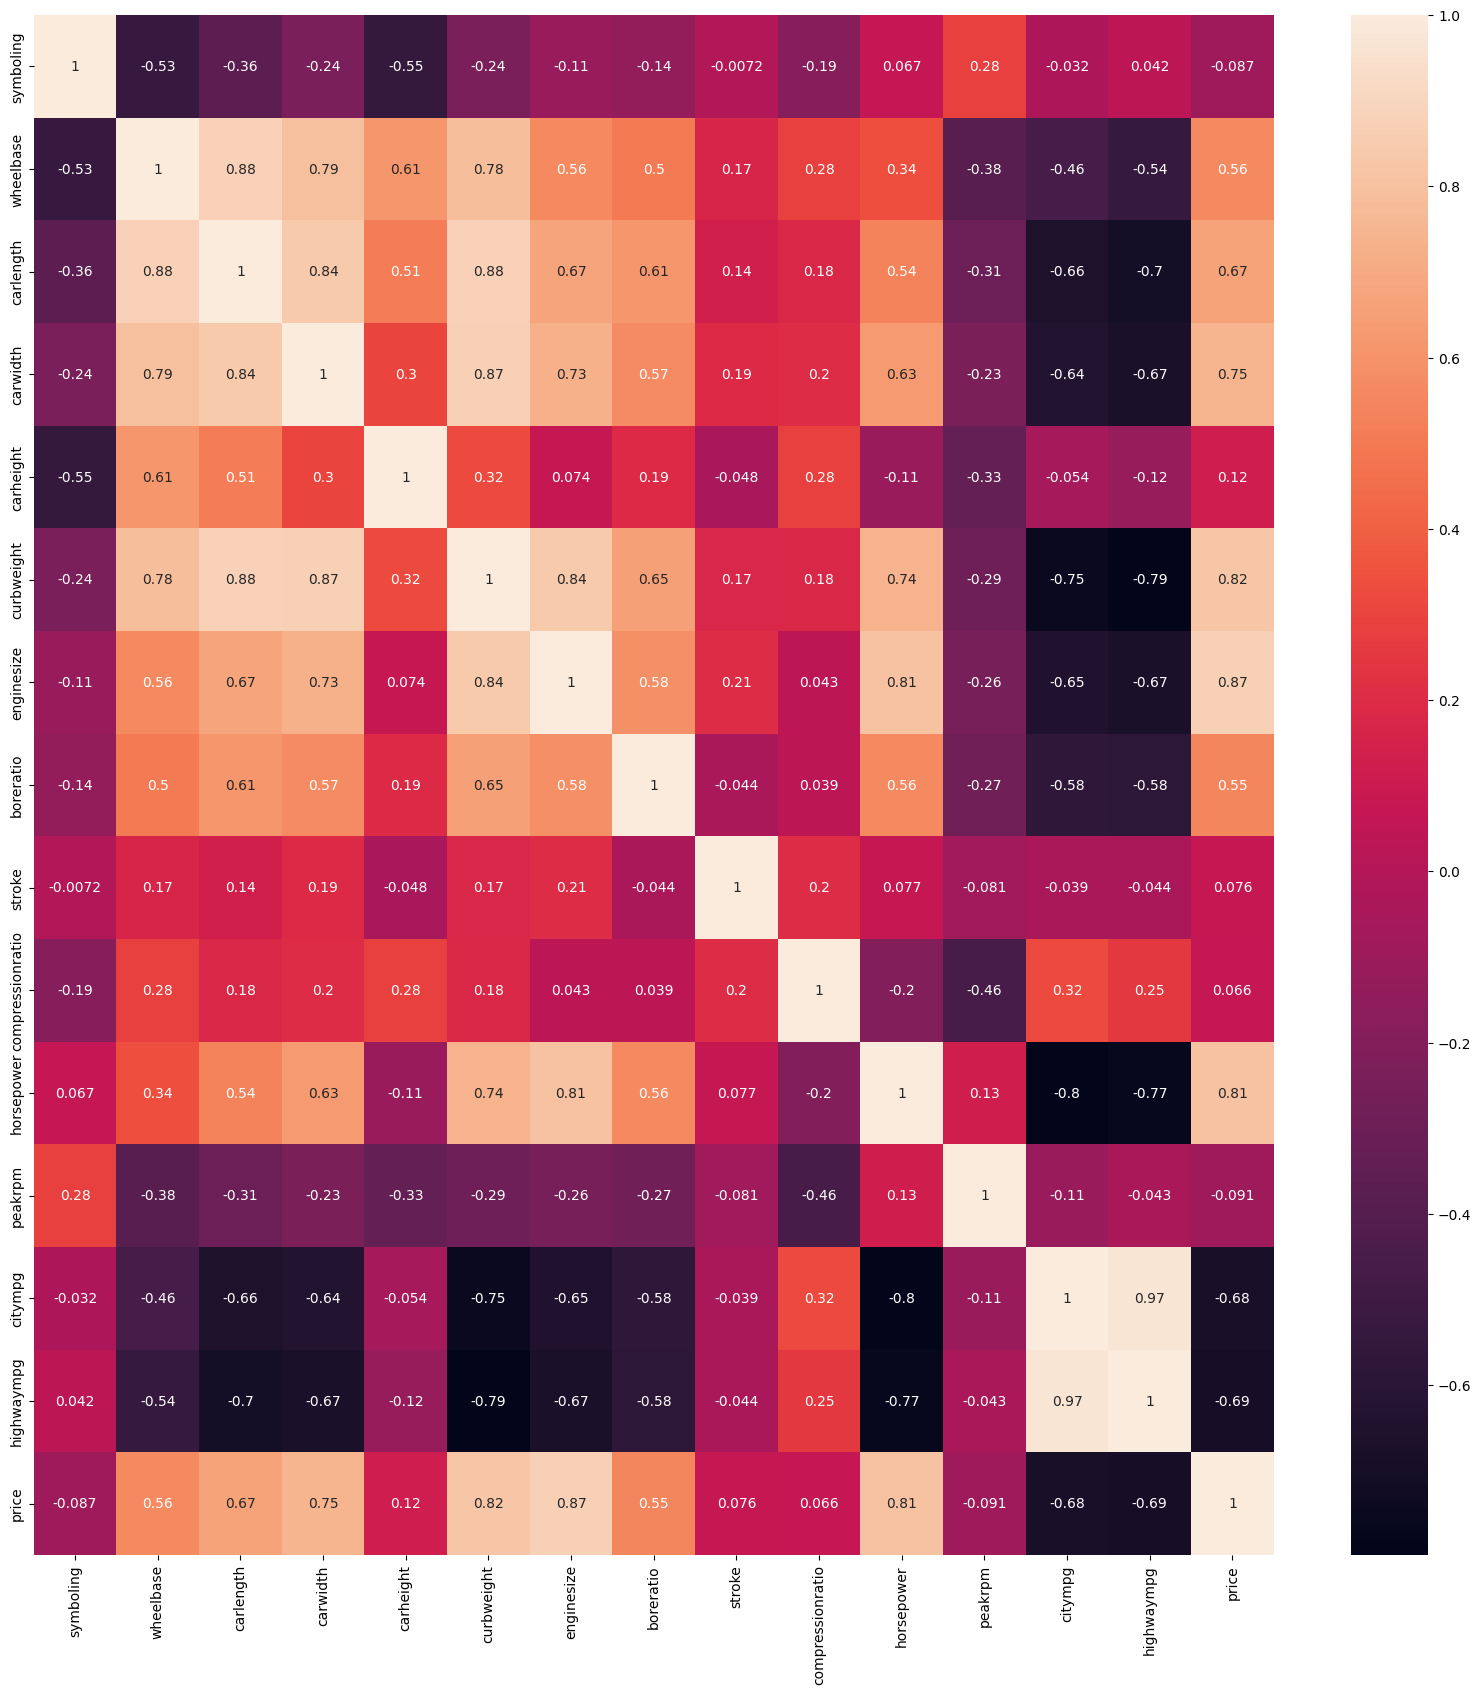

In [69]:
#Plotting the Heatmap to find the correlations
plt.figure(figsize = (20,20))
sns.heatmap(cars_data.corr(), annot = True)
plt.show()


In [70]:
cars_data = cars_data.drop(['doornumber', 'cylindernumber'], axis = 1)

In [71]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   carbody           210 non-null    object 
 1   drivewheel        210 non-null    object 
 2   enginelocation    210 non-null    object 
 3   fueltype          210 non-null    object 
 4   aspiration        210 non-null    object 
 5   enginetype        210 non-null    object 
 6   fuelsystem        210 non-null    object 
 7   symboling         210 non-null    int64  
 8   wheelbase         210 non-null    float64
 9   carlength         210 non-null    float64
 10  carwidth          210 non-null    float64
 11  carheight         210 non-null    float64
 12  curbweight        210 non-null    int64  
 13  enginesize        210 non-null    int64  
 14  boreratio         210 non-null    float64
 15  stroke            210 non-null    float64
 16  compressionratio  210 non-null    float64
 1

In [72]:
categories = cars_data.select_dtypes(include = ['object'])
categories.head()

,carbody,drivewheel,enginelocation,fueltype,aspiration,enginetype,fuelsystem,CarsCompany
0,convertible,rwd,front,gas,std,dohc,mpfi,alfa-romero
1,convertible,rwd,front,gas,std,dohc,mpfi,alfa-romero
2,hatchback,rwd,front,gas,std,ohcv,mpfi,alfa-romero
3,sedan,fwd,front,gas,std,ohc,mpfi,audi
4,sedan,4wd,front,gas,std,ohc,mpfi,audi


In [73]:
#Creating the dummy variables
dummies = pd.get_dummies(categories, drop_first = True)
cars_df = pd.concat([cars_data, dummies], axis = 1)

In [74]:
cars_df = cars_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation','enginetype', 'fuelsystem', 'CarsCompany'], axis = 1)


In [75]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               210 non-null    int64  
 1   wheelbase               210 non-null    float64
 2   carlength               210 non-null    float64
 3   carwidth                210 non-null    float64
 4   carheight               210 non-null    float64
 5   curbweight              210 non-null    int64  
 6   enginesize              210 non-null    int64  
 7   boreratio               210 non-null    float64
 8   stroke                  210 non-null    float64
 9   compressionratio        210 non-null    float64
 10  horsepower              210 non-null    int64  
 11  peakrpm                 210 non-null    int64  
 12  citympg                 210 non-null    int64  
 13  highwaympg              210 non-null    int64  
 14  price                   210 non-null    fl

In [76]:
#Making the input set
X = cars_df.drop(['price'], axis = 1)
X

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarsCompany_nissan,CarsCompany_peugeot,CarsCompany_plymouth,CarsCompany_porsche,CarsCompany_renault,CarsCompany_saab,CarsCompany_subaru,CarsCompany_toyota,CarsCompany_volkswagen,CarsCompany_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0,101.2,176.8,64.8,54.3,2765,164,3.31,3.19,9.0,...,0,0,0,0,0,0,0,0,0,0
206,3,96.3,173.0,65.4,49.4,2328,122,3.35,3.46,8.5,...,0,0,0,0,0,0,0,0,0,0
207,0,107.9,186.7,68.4,56.7,3197,152,3.70,3.52,21.0,...,0,1,0,0,0,0,0,0,0,0
208,0,114.2,198.9,68.4,58.7,3230,120,3.46,3.19,8.4,...,0,1,0,0,0,0,0,0,0,0


In [77]:
#Creating the output set
y = cars_df['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
205    21105.0
206     8499.0
207    13200.0
208    12440.0
209    13860.0
Name: price, Length: 210, dtype: float64

In [78]:
#Splitting the data into the train and the test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [79]:
#Building and training the model
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions
score = r2_score(y_test, predictions)
score

0.8487349049057358

Text(0, 0.5, 'Predictions')

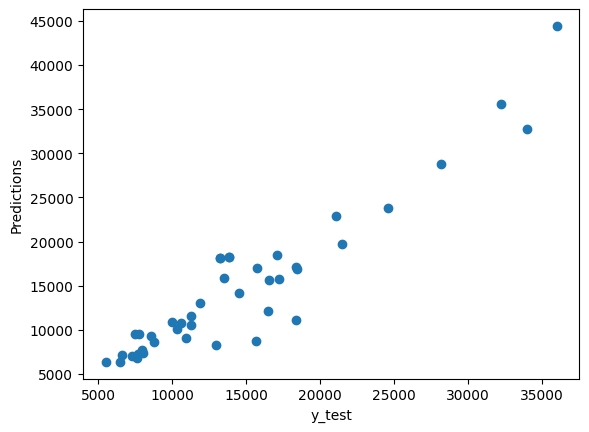

In [80]:
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('Predictions')

In [81]:
score

0.8487349049057358